<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n20.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

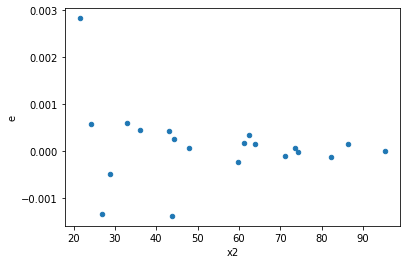

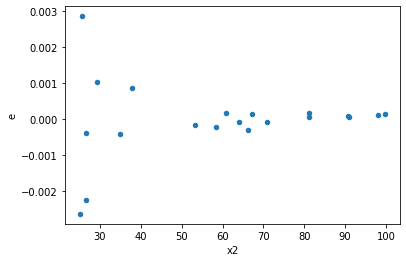

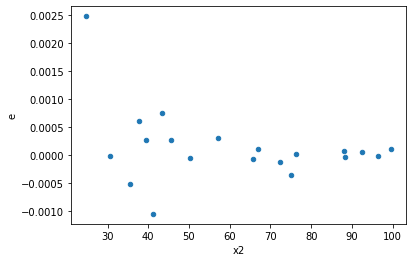

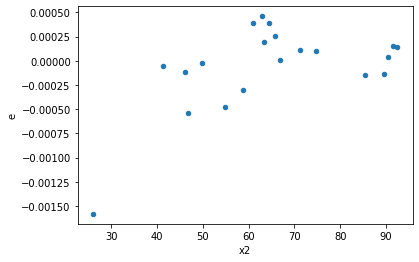

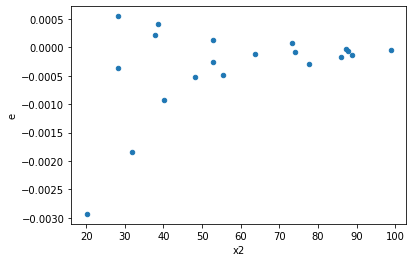

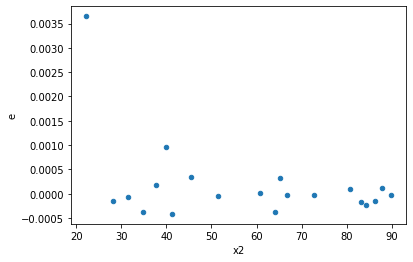

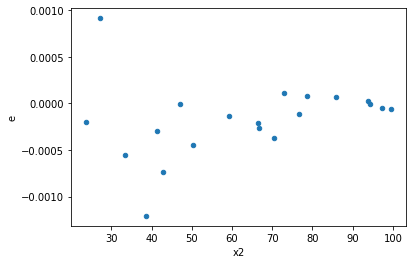

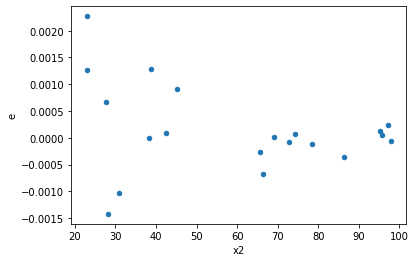

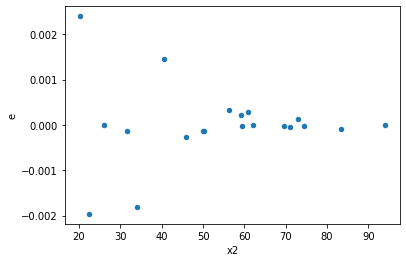

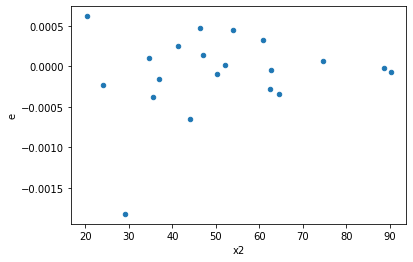

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,6.0,6.0,5.492101360033658e-07,2.2028422474347493e-06,9.153502266722763e-08,3.6714037457245824e-07,4.010927881748434,0.11517115086075558,0.9424144245696222,0.05758557543037779,Reject001=1 : Homoscedasticity
75.0,6.0,6.0,6.714659313389003e-07,1.2752022254637397e-06,1.1191098855648339e-07,2.1253370424395663e-07,1.8991316847915005,0.45470335567288545,0.7726483221635573,0.22735167783644272,Reject001=1 : Homoscedasticity
90.0,6.0,6.0,2.0203143260669097e-07,8.646365096525781e-07,3.36719054344485e-08,1.4410608494209635e-07,4.279712807540339,0.10021041064884106,0.9498947946755795,0.05010520532442053,Reject001=1 : Homoscedasticity
94.0,6.0,6.0,5.165567673578653e-07,5.298935854860047e-07,8.609279455964422e-08,8.831559758100077e-08,1.0258186882273477,0.9761060558925778,0.5119469720537111,0.4880530279462889,Reject001=1 : Homoscedasticity
105.0,6.0,6.0,4.622441886330608e-07,4.83847607670711e-07,7.704069810551014e-08,8.06412679451185e-08,1.0467359451322371,0.9572004188303704,0.5213997905848148,0.4786002094151852,Reject001=1 : Homoscedasticity
137.0,6.0,6.0,4.92248471134986e-07,6.207837875428373e-07,8.204141185583101e-08,1.0346396459047288e-07,1.2611187722157573,0.7853884411039349,0.6073057794480325,0.39269422055196745,Reject001=1 : Homoscedasticity
145.0,6.0,6.0,1.937614246361084e-06,1.9966887974260735e-06,3.2293570772684733e-07,3.327814662376789e-07,1.0304882931037143,0.9718506341229161,0.514074682938542,0.48592531706145803,Reject001=1 : Homoscedasticity
149.0,6.0,6.0,1.1500473114494477e-07,1.9951182367720558e-07,1.916745519082413e-08,3.3251970612867595e-08,1.7348140523519273,0.519930307393301,0.7400348463033495,0.2599651536966505,Reject001=1 : Homoscedasticity
151.0,6.0,6.0,1.3740436945852839e-06,2.167646544419331e-06,2.2900728243088066e-07,3.612744240698885e-07,1.5775674041236174,0.5937116005059195,0.7031441997470402,0.29685580025295977,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,8.938012080394009e-06,1.7952377013703927e-06,1.4896686800656681e-06,2.9920628356173214e-07,0.20085424871021818,0.07167572570756113,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,4.960410253675333e-06,1.2291991322098276e-07,8.267350422792222e-07,2.0486652203497126e-08,0.024780190938825532,0.00027262429795298505,Reject001=0 : Heteroscedasticity
2.0,6.0,6.0,6.5137703354139084e-06,8.131210981065548e-08,1.0856283892356513e-06,1.3552018301775914e-08,0.012483109723500656,3.6793270900789585e-05,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,7.729806099741959e-07,4.1796365321039407e-07,1.28830101662366e-07,6.966060886839901e-08,0.5407168663963599,0.4732971569568639,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,6.980776617588544e-06,2.6610235730104923e-07,1.1634627695980907e-06,4.435039288350821e-08,0.03811930561287209,0.0009364619356623016,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,6.453967638421961e-06,1.2137851134845166e-07,1.075661273070327e-06,2.022975189140861e-08,0.018806805076904524,0.00012234771470279694,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,2.351027248711697e-06,4.2329470570468186e-08,3.918378747852829e-07,7.054911761744698e-09,0.01800467033874816,0.00010773152046690845,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,1.076000576231619e-05,1.8523839739160738e-07,1.793334293719365e-06,3.0873066231934564e-08,0.017215455222185042,9.450522730993226e-05,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,8.743336542495206e-06,1.1687042952113994e-07,1.4572227570825343e-06,1.947840492018999e-08,0.01336679984272766,4.499658836538658e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    551
Reject001=1 : Homoscedasticity      449
Name: Result_test, dtype: int64